In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use("ggplot")
from pandas_datareader import data, wb
from statsmodels.tsa import stattools

In [6]:
from pkg_resources import get_distribution
import platform
print("python", platform.python_version())
print("")
libs = ["pandas", "numpy", "matplotlib", "pandas-datareader", "statsmodels"]
for lib in libs:
    version = get_distribution(lib).version
    print(lib, version)

python 3.5.2

pandas 0.20.3
numpy 1.13.1
matplotlib 2.0.2
pandas-datareader 0.5.0
statsmodels 0.8.0


In [7]:
# データ

start = "2016-08-01"
end = "2017-08-01"
price = data.DataReader("NIKKEI225", "fred", start, end) # 日経平均株価 from セントルイス連邦準備銀行
display(price.head(5))

NIKKEI225
DATE                 
2016-08-01   16635.77
2016-08-02   16391.45
2016-08-03   16083.11
2016-08-04   16254.89
2016-08-05   16254.45

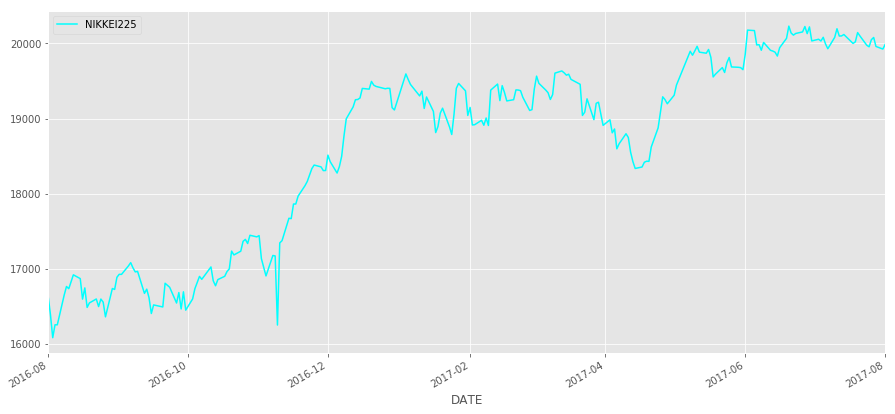

In [8]:
# 原型系列プロット

price_tmp = price.dropna()
price_tmp.plot(color="cyan", figsize=(15,7))
plt.show()

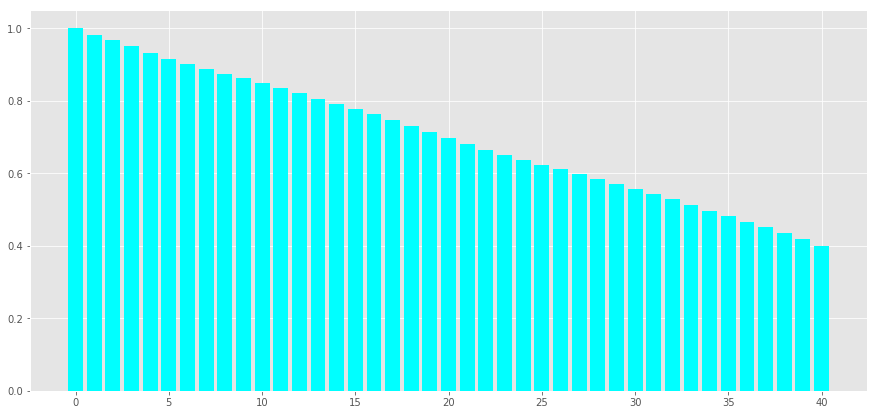

In [16]:
# 原型系列における自己相関係数

price_tmp = price.dropna()
acf = stattools.acf(price_tmp)
plt.figure(figsize=(15,7))
plt.bar(range(len(acf)), acf, color="cyan")
plt.show()

In [29]:
# 原型系列に対する拡張ディッキー-フラー（ADF）検定

price_tmp = price.dropna()
res_ctt = stattools.adfuller(price_tmp["NIKKEI225"], regression="ctt") # トレンド項あり（２次）、定数項あり
res_ct = stattools.adfuller(price_tmp["NIKKEI225"], regression="ct") # トレンド項あり（１次）、定数項あり
res_c = stattools.adfuller(price_tmp["NIKKEI225"], regression="c") # トレンド項なし、定数項あり
res_nc = stattools.adfuller(price_tmp["NIKKEI225"], regression="nc") # トレンド項なし、定数項なし
print(res_ctt)
print(res_ct)
print(res_c)
print(res_nc)
# いずれもp-valueが高く、帰無仮説「単位根過程である」を棄却できない

(-2.6708678219785331, 0.47095101565941583, 1, 245, {'5%': -3.8567110211051521, '1%': -4.4190482250252874, '10%': -3.5682896447228618}, 3022.9312013403046)
(-2.0935231326738535, 0.54972174948713115, 1, 245, {'5%': -3.4285636226572258, '1%': -3.996204153626465, '10%': -3.1376703806237196}, 3023.2796069397737)
(-1.4657871744530102, 0.55036298288220797, 1, 245, {'5%': -2.873410402808354, '1%': -3.4573260719088132, '10%': -2.5730959808413161}, 3023.3326170286091)
(1.3888258295690681, 0.958418587844728, 1, 245, {'5%': -1.9421502633766543, '1%': -2.5749261391087046, '10%': -1.6157794081377657}, 3024.1825324119814)


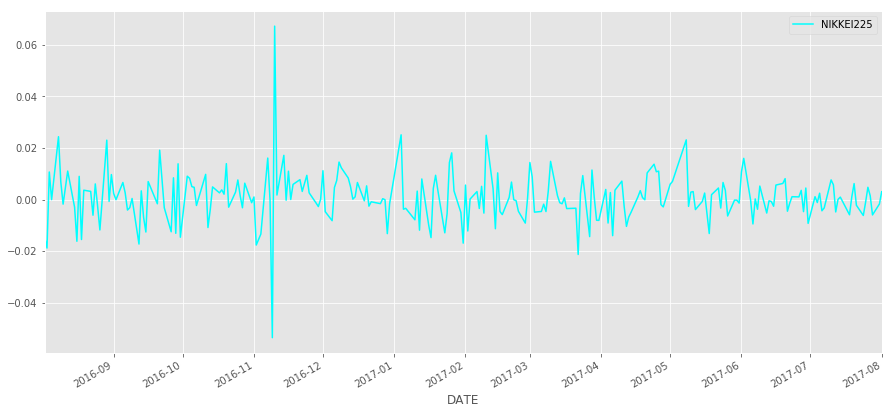

In [27]:
# 差分系列プロット

price_tmp = price.dropna()
price_tmp = price_tmp.pct_change().dropna()
price_tmp.plot(color="cyan", figsize=(15,7))
plt.show()

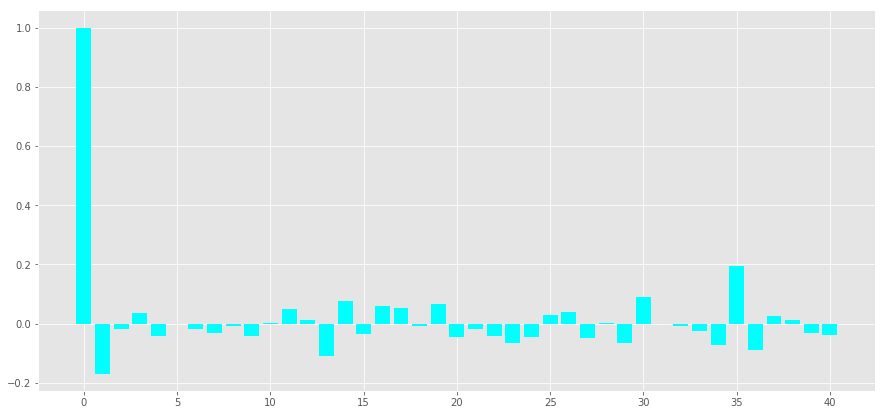

In [17]:
# 差分系列における自己相関係数

price_tmp = price.dropna()
price_tmp = price_tmp.pct_change().dropna()
acf = stattools.acf(price_tmp)
plt.figure(figsize=(15,7))
plt.bar(range(len(acf)), acf, color="cyan")
plt.show()

In [33]:
# 差分系列に対するADF検定

price_tmp = price.dropna()
price_tmp = price_tmp.pct_change().dropna()
res_ctt = stattools.adfuller(price_tmp["NIKKEI225"], regression="ctt") # トレンド項あり（２次）、定数項あり
res_ct = stattools.adfuller(price_tmp["NIKKEI225"], regression="ct") # トレンド項あり（１次）、定数項あり
res_c = stattools.adfuller(price_tmp["NIKKEI225"], regression="c") # トレンド項なし、定数項あり
res_nc = stattools.adfuller(price_tmp["NIKKEI225"], regression="nc") # トレンド項なし、定数項なし
print(res_ctt)
print(res_ct)
print(res_c)
print(res_nc)

(-18.53495087449857, 0.0, 0, 245, {'5%': -3.8567110211051521, '1%': -4.4190482250252874, '10%': -3.5682896447228618}, -1471.9831023254719)
(-18.569600944152249, 0.0, 0, 245, {'5%': -3.4285636226572258, '1%': -3.996204153626465, '10%': -3.1376703806237196}, -1473.9769098772795)
(-18.573850361382071, 2.0812381561892271e-30, 0, 245, {'5%': -2.873410402808354, '1%': -3.4573260719088132, '10%': -2.5730959808413161}, -1475.1971292373319)
(-18.448324620227524, 3.9512212703301954e-29, 0, 245, {'5%': -1.9421502633766543, '1%': -2.5749261391087046, '10%': -1.6157794081377657}, -1474.6347969721928)


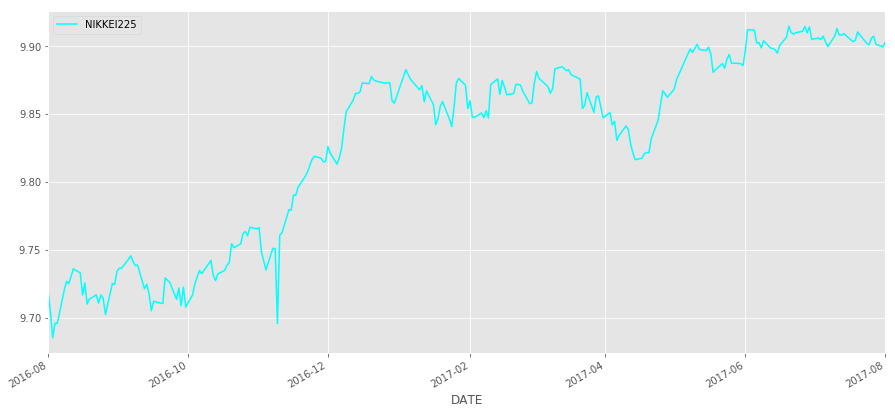

In [30]:
# 対数系列プロット

price_tmp = price.dropna()
price_log = np.log(price_tmp)
price_log.plot(color="cyan", figsize=(15,7))
plt.show()